<a href="https://colab.research.google.com/github/VLazukina/projects_2022/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%9B%D0%B0%D0%B7%D1%83%D0%BA%D0%B8%D0%BD%D0%B0_%D0%92_%D0%90_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестовое задание. 

Выполнила Лазукина В.А.

## Основная цель: 

Провести анализ ABCD теста и предоставить краткий отчет о проведенном тесте на основе данных.

## Описание данных:
Дополнить

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.express as px
from plotly import graph_objects as go
!pip install plotly
import math as mth
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
pd.set_option('display.max_colwidth', 500)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#откроем файл
data = pd.read_table('/content/drive/MyDrive/database_commonreq_result.txt')

In [4]:
#выведем первые пять строк
data.head()

,client_id,date,date_time,event
0,1573977032671590913,2022-06-08,2022-06-08 00:00:00,Доскролл
1,1654635578953887170,2022-06-08,2022-06-08 00:00:02,Потерял фокус
2,1649673413138627555,2022-06-08,2022-06-08 00:00:02,Потерял фокус
3,161838811373367725,2022-06-08,2022-06-08 00:00:03,Потерял фокус
4,1654632746278308210,2022-06-08,2022-06-08 00:00:03,Потерял фокус


In [5]:
#посмотрим на общее представление о данных
print('----------------------Выведем информацию о датафрейме методом info()----------------------')
print()
data.info()
print()
print('----------------------Выведем информацию о количестве явных дубликатов----------------------')
print()
print('Количество строк-дубликатов равно:', data.duplicated().sum())
print(f'В случае удаления, доля дубликатов составит: {round(data.duplicated().sum() / len(data) * 100, 2)} %')
print()
print('----------------------Выведем информацию о количестве уникальных значений в столбцах----------------------')
display(data.nunique().reset_index().rename(columns={'index':'columns', 0: 'count'}).sort_values(by = 'count').reset_index(drop = True))
print()
print('----------------------Выведем информацию о доле пропущенных значений в столбцах....................')
data.isna().mean().sort_values(ascending=False)

----------------------Выведем информацию о датафрейме методом info()----------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679186 entries, 0 to 1679185
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   client_id  1679186 non-null  uint64
 1   date       1679186 non-null  object
 2   date_time  1679186 non-null  object
 3   event      1679186 non-null  object
dtypes: object(3), uint64(1)
memory usage: 51.2+ MB

----------------------Выведем информацию о количестве явных дубликатов----------------------

Количество строк-дубликатов равно: 460095
В случае удаления, доля дубликатов составит: 27.4 %

----------------------Выведем информацию о количестве уникальных значений в столбцах----------------------


,columns,count
0,date,7
1,event,12
2,client_id,186074
3,date_time,405717



----------------------Выведем информацию о доле пропущенных значений в столбцах....................


client_id    0.0
date         0.0
date_time    0.0
event        0.0
dtype: float64

In [6]:
#примеры строк дубликатов
data[data.duplicated() == True].head()

,client_id,date,date_time,event
9,1654634780618195948,2022-06-08,2022-06-08 00:00:06,group_lub
15,1653997270333671050,2022-06-08,2022-06-08 00:00:10,group_lub
16,1653997270333671050,2022-06-08,2022-06-08 00:00:10,group_lub
20,1654635578953887170,2022-06-08,2022-06-08 00:00:11,group_stats
21,1654635613161673353,2022-06-08,2022-06-08 00:00:11,group_editorial


In [7]:
#изменим тип данных
#data['client_id'] = data['client_id'].astype('int64')
data['date'] = pd.to_datetime(data['date'])
data['date_time'] = pd.to_datetime(data['date_time'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679186 entries, 0 to 1679185
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   client_id  1679186 non-null  uint64        
 1   date       1679186 non-null  datetime64[ns]
 2   date_time  1679186 non-null  datetime64[ns]
 3   event      1679186 non-null  object        
dtypes: datetime64[ns](2), object(1), uint64(1)
memory usage: 51.2+ MB


In [8]:
#посмотрим на примере одной строки
#data.query('client_id == 1654634780618195948 and event == "group_lub"')

In [9]:
#данная информация есть в условиях задачи, выведем ее для сверки с условием задания
data['event'].value_counts()

Потерял фокус       384925
Доскролл            316943
group_random        178907
group_lub           178486
group_editorial     176798
group_stats         175253
Закрыл страницу     170497
Просмотр новости     85236
error_lub             7629
error_stats           3339
Клик по обвесу        1085
error_random            88
Name: event, dtype: int64

**Данные по объему совпадают с заявленным в условии задания**

In [10]:
df = data.groupby(['client_id', 'date', 'event']).size().reset_index(name='count') 

df.head(20)


,client_id,date,event,count
0,3795356123,2022-06-08,group_stats,3
1,3795356123,2022-06-08,Доскролл,1
2,3795356123,2022-06-08,Закрыл страницу,1
3,3795356123,2022-06-08,Потерял фокус,1
4,4208855170,2022-06-08,group_editorial,3
5,4208855170,2022-06-08,Доскролл,1
6,4208855170,2022-06-08,Закрыл страницу,1
7,4208855170,2022-06-08,Потерял фокус,1
8,4527584434,2022-06-14,group_random,3
9,4527584434,2022-06-14,Доскролл,2


In [11]:
#составим список клиентов и их распределение по группам
group_list = df[['client_id', 'event']].loc[df['event'].isin(['group_stats','group_editorial', 'group_random', 'group_lub'])].rename({'event': 'group'}, axis='columns')

group_list.head()

,client_id,group
0,3795356123,group_stats
4,4208855170,group_editorial
8,4527584434,group_random
11,16399830454845,group_lub
16,158365440478571,group_editorial


In [12]:
#добавим в основном датафрейм столбец с группой и удалим из столбца event все event, где просто указано распределение по группам 
data['event'] = data['event'].loc[~data['event'].isin(['group_stats','group_editorial', 'group_random', 'group_lub'])]
data = data.merge(group_list, on='client_id')
data.head()

,client_id,date,date_time,event,group
0,1573977032671590913,2022-06-08,2022-06-08 00:00:00,Доскролл,group_editorial
1,1573977032671590913,2022-06-08,2022-06-08 00:00:00,Доскролл,group_editorial
2,1573977032671590913,2022-06-08,2022-06-08 00:00:12,Потерял фокус,group_editorial
3,1573977032671590913,2022-06-08,2022-06-08 00:00:12,Потерял фокус,group_editorial
4,1573977032671590913,2022-06-08,2022-06-08 00:00:55,Потерял фокус,group_editorial


In [13]:
#посмотрим на количество уникальных пользователей в датафрейме:
print('Количество уникальных пользователей равно:', data['client_id'].nunique())
print()

#посмотрим на количество событий  по группам

#создадим таблицу

user_count = data.groupby('group')['client_id'].nunique().reset_index().rename(columns = {'client_id': 'count'}).sort_values(by = 'count', ascending = False).reset_index(drop=True)
user_count['%'] = user_count['count'] / user_count['count'].sum() * 100

#выведем общую информацию:
print('Количество уникальных пользователей по группам')
display(user_count.style.\
                    bar(subset = 'count',
                    align = 'mid',
                    color = ['yellowgreen'],
                    vmax=user_count['count'].sum()).\
                    set_properties(**{'text-align':'center'}, subset = ['count']) )
print()
print('Сумма значений равна:', user_count['count'].sum())

Количество уникальных пользователей равно: 185326

Количество уникальных пользователей по группам


,group,count,%
0,group_lub,46852,25.136272
1,group_editorial,46549,24.973711
2,group_stats,46519,24.957616
3,group_random,46472,24.932401



Сумма значений равна: 186392


**36 пользователей состоят в двух группах**

In [14]:
#посмотрим на количество событий 
#создадим таблицу
event_count = data.groupby('event')['client_id'].count().reset_index().rename(columns = {'client_id': 'count'}).sort_values(by = 'count', ascending = False).reset_index(drop=True)
event_count['%'] = event_count['count'] / event_count['count'].sum() * 100
#выведем общую информацию:
print('Перечень событий с количеством записей в каждой')
display(event_count.style.\
                    bar(subset = 'count',
                    align = 'mid',
                    color = ['yellowgreen'],
                    vmax=event_count['count'].sum()).\
                    set_properties(**{'text-align':'center'}, subset = ['count']) )
print()
print('Сумма значений равна:', event_count['count'].sum())
print()
print('Количество строк в общем датафрейме равно:', len(data))

Перечень событий с количеством записей в каждой


,event,count,%
0,Потерял фокус,601199,44.046303
1,Доскролл,397889,29.150979
2,Закрыл страницу,235387,17.245416
3,Просмотр новости,116682,8.548602
4,error_lub,8745,0.640695
5,error_stats,3279,0.240233
6,Клик по обвесу,1644,0.120446
7,error_random,100,0.007326



Сумма значений равна: 1364925

Количество строк в общем датафрейме равно: 2324246


In [15]:
#визуализируем
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']
fig = go.Figure(data=[go.Pie(labels=event_count['event'], values=event_count['count'], marker_colors=irises_colors)])
fig.update_layout(
    title= 'Распределение событий по количеству',
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0))
fig.show() 

In [16]:
#for group in data['group'].unique():
#

In [17]:
#создадим датафрейм в котором информации о группе, уникальном пользователе и количестве событий на него
event_per_user = data.groupby(['group','client_id'])['event'].count().reset_index().rename(columns={'event':'event_count'})
event_per_user.sort_values(by = 'event_count', ascending = False).head()

,group,client_id,event_count
98091,group_random,1525612115769850013,5034
136661,group_random,15479947421016882749,4830
21102,group_editorial,1646896511144953034,3620
90548,group_lub,15964342881041510155,3480
114356,group_random,1646577664945232177,2904


In [18]:
#вызовем метод describe()
event_per_user['event_count'].describe(percentiles = [.25, .50, .75, .95, .99])

count    186392.000000
mean          7.322873
std          43.671215
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
95%          16.000000
99%          54.000000
max        5034.000000
Name: event_count, dtype: float64

In [19]:
#вызовем метод describe() с группировой по группам, а следом визуализируем на ящике с усами
event_per_user.groupby('group')['event_count'].describe(percentiles = [.25, .50, .75, .95, .99])

,count,mean,std,min,25%,50%,75%,95%,99%,max
group,,,,,,,,,,
group_editorial,46549.0,7.036628,36.695751,0.0,2.0,4.0,5.0,16.0,55.52,3620.0
group_lub,46852.0,7.575130,44.186170,0.0,3.0,4.0,5.0,16.0,56.00,3480.0
group_random,46472.0,7.665196,55.028021,0.0,2.0,4.0,5.0,16.0,58.00,5034.0
group_stats,46519.0,7.013263,36.090933,0.0,3.0,4.0,5.0,16.0,51.00,1905.0


In [30]:
#выведем информацию о минимальной и максимальной дате:
print(f'Минимальная дата в датафрейме: {data["date_time"].min()}')
print(f'Максимальная дата в датафрейме: {data["date_time"].max()}')

Минимальная дата в датафрейме: 2022-06-08 00:00:00
Максимальная дата в датафрейме: 2022-06-14 23:59:59


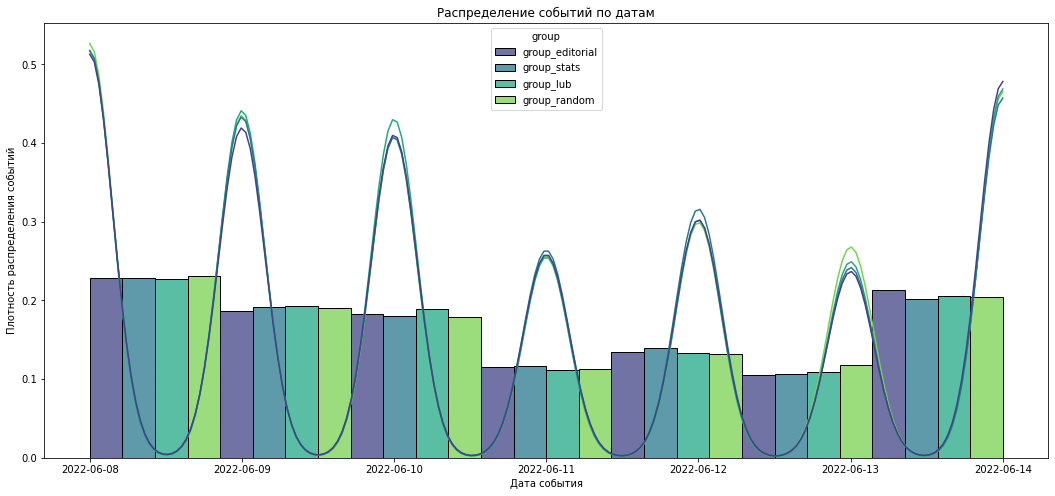

In [20]:
#посмотрим, как распределены данные на графике
#Для этого будем использовать независимую нормализацию плотности, чтобы сравнить распределение подмножеств, которые существенно различаются по размеру. 
#В данном случае обойдемся без параметра multiple='stack', путем наложения плотностей мы посмотрим на распределение.
sns.histplot(data = data, x = 'date', hue='group', kde=True, stat='density', common_norm=False, palette = 'viridis', alpha = 0.75, bins=7, multiple='dodge')
plt.title('Распределение событий по датам')
plt.xlabel('Дата события') 
plt.ylabel('Плотность распределения событий')
plt.show()

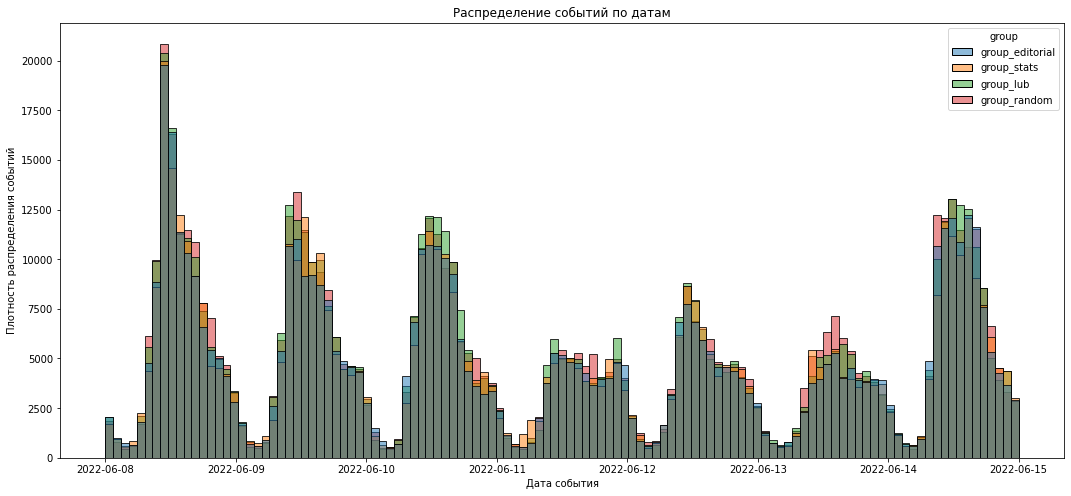

In [31]:
sns.histplot(data = data, x = 'date_time', hue='group')
plt.title('Распределение событий по датам')
plt.xlabel('Дата события') 
plt.ylabel('Количество событий')
plt.show()

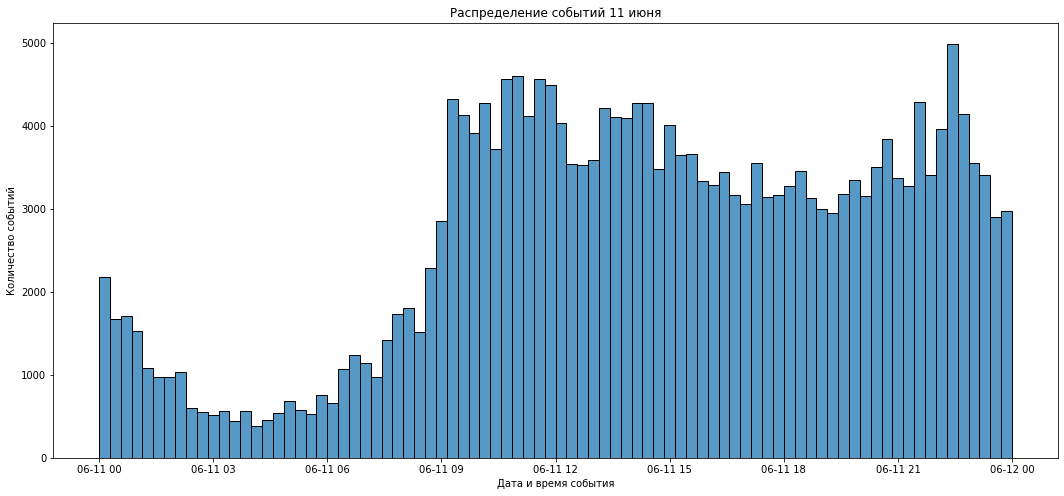

In [32]:
#посмотрим, как распределены данные на графике за рандомный день. Например, 3 августа
sns.histplot(data = data.query('date == "2022-06-11"'), x = 'date_time')
plt.title('Распределение событий 11 июня')
plt.xlabel('Дата и время события') 
plt.ylabel('Количество событий')
plt.show()

In [33]:
#сделаем таблицу с группировкой по событиям, с отображением информации о количестве записей о событии
#количестве уникальных пользователей, 
#доле таких пользователей от общего количества уникальных пользователей
clients_per_event = data.groupby('event')['client_id'].agg(['count','nunique']).\
                  rename(columns = {'count': 'event_count', 'nunique':'unique_clients'}).\
                  reset_index().sort_values(by = 'unique_clients', ascending = False).\
                  reset_index(drop=True)
clients_per_event['share_of_gen_clients'] = round(clients_per_event['unique_clients'] / data['client_id'].nunique() * 100, 1)

#сразу введем столбцы с % от пользователей, дошедших с первого шага и с % от пользователей от предыдущего шага:
prev_clients = clients_per_event.loc[0,'unique_clients']
start_clients = prev_clients

for i in clients_per_event.index:
    clients_per_event.loc[i,'perc_clients_from_last'] = (clients_per_event.loc[i,'unique_clients'] / prev_clients * 100).round(1)
    clients_per_event.loc[i,'perc_clients_from_start'] = (clients_per_event.loc[i,'unique_clients'] / start_clients * 100).round(1)
    prev_clients = clients_per_event.loc[i,'unique_clients']
clients_per_event

,event,event_count,unique_clients,share_of_gen_clients,perc_clients_from_last,perc_clients_from_start
0,Доскролл,397889,152826,82.5,100.0,100.0
1,Потерял фокус,601199,148418,80.1,97.1,97.1
2,Закрыл страницу,235387,115054,62.1,77.5,75.3
3,Просмотр новости,116682,64462,34.8,56.0,42.2
4,error_lub,8745,6426,3.5,10.0,4.2
5,error_stats,3279,2996,1.6,46.6,2.0
6,Клик по обвесу,1644,814,0.4,27.2,0.5
7,error_random,100,74,0.0,9.1,0.0


In [34]:
#создадим таблицу
clients_per_event_gr = data.groupby(['event', 'group'])['client_id'].agg(['count','nunique']).\
                  rename(columns = {'count': 'event_count', 'nunique':'unique_clients'}).\
                  reset_index().sort_values(by = 'unique_clients', ascending = False).\
                  reset_index(drop=True)
clients_per_event_gr['share_of_gen_clients'] = round(clients_per_event_gr['unique_clients'] / data['client_id'].nunique() * 100, 1)

#сразу введем столбцы с % от пользователей, дошедших с первого шага и с % от пользователей от предыдущего шага:
prev_clients = clients_per_event_gr.loc[0,'unique_clients']
start_clients = prev_clients

for i in clients_per_event_gr.index:
    clients_per_event_gr.loc[i,'perc_clients_from_last'] = (clients_per_event_gr.loc[i,'unique_clients'] / prev_clients * 100).round(1)
    clients_per_event_gr.loc[i,'perc_clients_from_start'] = (clients_per_event_gr.loc[i,'unique_clients'] / start_clients * 100).round(1)
    prev_clients = clients_per_event_gr.loc[i,'unique_clients']
    
clients_per_event_gr

,event,group,event_count,unique_clients,share_of_gen_clients,perc_clients_from_last,perc_clients_from_start
0,Доскролл,group_lub,101006,38618,20.8,100.0,100.0
1,Доскролл,group_stats,96959,38556,20.8,99.8,99.8
2,Доскролл,group_random,101642,38430,20.7,99.7,99.5
3,Доскролл,group_editorial,98282,38172,20.6,99.3,98.8
4,Потерял фокус,group_lub,155631,37426,20.2,98.0,96.9
5,Потерял фокус,group_editorial,141990,37366,20.2,99.8,96.8
6,Потерял фокус,group_random,162502,37320,20.1,99.9,96.6
7,Потерял фокус,group_stats,141076,37226,20.1,99.7,96.4
8,Закрыл страницу,group_lub,60517,28976,15.6,77.8,75.0
9,Закрыл страницу,group_editorial,56953,28914,15.6,99.8,74.9
